# General Pandas References

1. Data School playlist: https://www.youtube.com/watch?v=yzIMircGU5I&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y
  - What do I need to know about the pandas index?: [#17, Part 1](https://www.youtube.com/watch?v=OYZNk7Z9s6I&index=17&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y), [#18, Part 2](https://www.youtube.com/watch?v=15q-is8P_H4&index=18&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y)
  - How do I avoid a SettingWithCopyWarning in pandas?: [#27](https://www.youtube.com/watch?v=4R4WsDJ-KVc)
2. Brandon Rhodes - Pandas From The Ground Up - PyCon 2015:  https://www.youtube.com/watch?v=5JnMutdy6Fw
3. How to Create Pandas DataFrame from Series - https://www.statology.org/pandas-create-dataframe-from-series/

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# use alcohol consumption by country example dataset
# drinks = pd.read_csv('http://bit.ly/drinksbycountry')
# drinks.to_csv('./datasets/drinksbycountry.csv', index = False)  # make local copy
data_dir = ".\\datasets\\"
df_drinks = pd.read_csv(data_dir + "drinksbycountry.csv")
df_drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


# Accessing columns

+ df[column_name] returns a pandas series of the column values
+ df[[column_name]] returns a pandas dataframe of the columns values

In [3]:
# columns are pandas flavored series - unlike numpy series
print(type(df_drinks['wine_servings']))
print(type(df_drinks[['wine_servings']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


# Filtering rows with a boolean mask - single boolean expression

If you pass a boolean series with a length that is as the same as the number of columns into the square brackets `[]`, pandas assumes that this is a filter and will return a new dataframe where the rows were True. The next few cells illustrate this idea.

<Axes: >

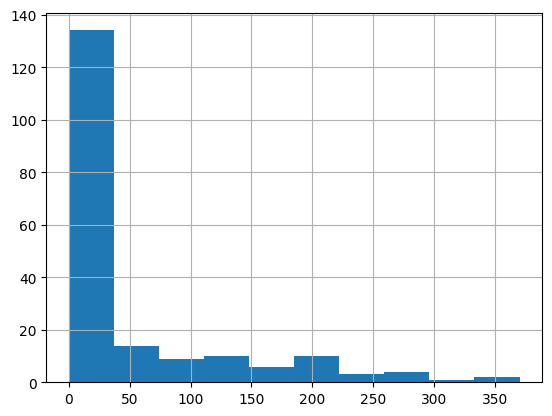

In [4]:
# quick look at the distribution of wine servings
df_drinks['wine_servings'].hist()

In [5]:
# a boolean mask with a single boolean expression works fine: e.g. wine_servings > 50
wine_servings_gt50 = df_drinks['wine_servings'] > 50
# print(type(wine_servings_gt50))  # pandas.core.series.Series
wine_servings_gt50

0      False
1       True
2      False
3       True
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: wine_servings, Length: 193, dtype: bool

In [6]:
# apply the mask by passing it into the brackets
df_drinks_wine_gt50 = df_drinks[wine_servings_gt50]
df_drinks_wine_gt50.shape  # little under a third of the rows remain

(55, 6)

In [7]:
# or you can just put the expression directly into the brackets and get the same result
df_drinks[df_drinks['wine_servings'] > 50].shape

(55, 6)

## The mask used for filtering rows must be same length as the number of dataframe rows

In [8]:
# If you try to pass a boolean mask that is smaller than the number of total rows, you get an error
test_mask = np.array([True, False, False, True])
# df_drinks_small_mask = df_drinks[test_mask]
# df_drinks_small_mask  # ValueError: Item wrong length 4 instead of 193.

# Filtering with boolean mask - compound boolean expression

Using the expression `df_drinks['wine_servings'] > 50` works fine, but if you try a compound expression as shown in the next cell, you get an error because the regular python `and` was not designed as a vectorized operation:

In [9]:
# The next line looks like it should work, but it throws the error:
# ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
# df_drinks[df_drinks['wine_servings'] > 50 and df_drinks['wine_servings'] < 200]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## A couple of ways to create compound boolean masks

1. We can use np.logical_xxx functions (e.g. **np.logical_and**, **np.logical_or**, etc.)
2. We can use the bitwise AND operator with () wrapping each boolean expression

In [11]:
# The first way: using the numpy vectorized AND
compound_mask = np.logical_and(df_drinks['wine_servings'] > 50, df_drinks['wine_servings'] < 200)
# compound_mask.shape  # (193,)
df_drinks[compound_mask].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,Europe
9,Austria,279,75,191,9.7,Europe
11,Bahamas,122,176,51,6.3,North America
25,Bulgaria,231,252,94,10.3,Europe
32,Canada,240,122,100,8.2,North America


In [12]:
# The second way: using the bitwise AND - wrapping with () IS REQUIRED because of & precedence
compound_mask2 = (df_drinks['wine_servings'] > 50) & (df_drinks['wine_servings'] < 200)
#compound_mask2.shape  # (193,)
df_drinks[compound_mask2].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,Europe
9,Austria,279,75,191,9.7,Europe
11,Bahamas,122,176,51,6.3,North America
25,Bulgaria,231,252,94,10.3,Europe
32,Canada,240,122,100,8.2,North America


In [15]:
print(type(sorted(df_drinks['beer_servings'], reverse=True)))  # list
# return a list of sorted beer serving values
beer_servings_list = sorted(df_drinks['beer_servings'], reverse=True)  # reverse = False is default, ascending order
beer_servings_list[:5]

<class 'list'>


[376, 361, 347, 346, 343]

## Create a new column for existing columns

In [ ]:
df_drinks['total_servings'] = df_drinks['beer_servings'] + df_drinks['spirit_servings'] + \
                              df_drinks['wine_servings']
df_drinks.head()

### Does a column in a pandas data frame have to have the same type?

Let's try to create data frame with columns that are not the same type.

In [ ]:
# create an list to as as the index
my_index = ["row" + str(i) for i in range(0, 10)]
# create a list to use as a column
my_pandas_list1 = [1, 1.1, "one", 2, 2.2, "two", 3, 3.3, "three", 3.4]
my_pandas_list2 = [4, 4.2, "four", 5, 5.3, "five", 6, 6.4, "three", 6.5]
my_pandas_list3 = [7, 7.3, "seven", 8, 8.4, "eight", 9, 9.5, "three", 9.6]
my_pandas_series1 = pd.Series(my_pandas_list1)
my_pandas_series2 = pd.Series(my_pandas_list2)
my_pandas_series3 = pd.Series(my_pandas_list3)
print(my_pandas_list1)
print(type(my_pandas_list1))
print(my_pandas_series1)
print(type(my_pandas_series1))
print(type(my_pandas_series1[0]))
print(type(my_pandas_series1[1]))
print(type(my_pandas_series1[2]))

Looks like we can create pandas series that contain different data types. Can we create a dataframe from series containing different types? The next two cells seems answer *yes*.

In [ ]:
df_from_cols = pd.concat([my_pandas_series1, my_pandas_series2, my_pandas_series3], axis=1)
df_from_cols

## Changing column names

Use the `.rename()` method and pass a dict to the `columns` parameter:

In [ ]:
# change column names
df_from_cols.rename(columns = {0: "col0", 1: "col1", 2: "col2"})

## Pandas is a little strange in how it accesses data

+ df[*some_integer*] - Pandas interprets *some_integer* as a column index. E.g. df[0] returns column 0 of the dataframe
+ df[*column_name*] - this will throw a *key_error*

In [ ]:
df_from_cols[0]

In [ ]:
df_from_cols['col1']

## Filtering using `.loc[]` property (not a method as seen in many online postings)

general syntax (image take from https://www.sharpsightlabs.com/blog/pandas-loc/)

<img src="datasets/pandas-loc-syntax-explanation.png">

### column label is optional

If you don't pass a column label, all the columns will be reteived by default.

## How to use the index

In [ ]:
# try to print the index
print(df_drinks.index)

In [ ]:
# we could put the index values into a list which we can print
# print([i for i in drinks.index])

## Things to know about the index

+ Every dataframe has an index (not optional)
+ aka *row labels*
+ Index and columns default to integers if they aren't specified

### Three reasons why the index exists

1. Identification - 
2. Selection - 
3. Alignment - 

In [ ]:
drinks.columns  # "Index" here is the type of object, not "the index"

In [ ]:
# Note that the index and the columns headers are NOT part of the dataframe
drinks.shape

In [ ]:


dir_list = os.listdir(data_path)
# print all the files in directory
print(dir_list)

In [ ]:
# data_file_path = data_path + "\\movie_user.psv"
# pd.read_table(data_file_path, header=None, sep='|').head()  # index and columns default to integers

# Filter by []

In [ ]:
# "1. Identification"
drinks[drinks['continent']=='South America']  # note the row labels stayed with the selected rows

## Using `.loc[]` property



In [ ]:
# reference url in previous cell
country_data_dict = {
    'country':['USA', 'China', 'Japan', 'Germany', 'UK', 'India']
    ,'continent':['North America','Asia','Asia','Europe','Europe','Asia']
    ,'GDP':[19390604, 12237700, 4872137, 3677439, 2622434, 2597491]
    ,'population':[322179605, 1403500365, 127748513, 81914672, 65788574, 1324171354]
}

df_countries = pd.DataFrame(country_data_dict)
df_countries

In [ ]:
# using row label and column label
df_countries.loc[1, "country"]

In [ ]:
# using just a row label returns a pandas series object
print(df_countries.loc[1])
print(type(df_countries.loc[1]))

In [ ]:
# passing a slice as the first arg returns pandas DataFrame
print(df_countries.loc[1:3])
print(type(df_countries.loc[1:3]))

In [ ]:
# "2. Selection"
drinks.loc[23, 'beer_servings']  # row id'd by 23

In [ ]:
# since each row is a unique country, we could set it to the index
drinks.set_index('country', inplace=True)
drinks.head()  # note position of the columns headers

In [ ]:
# now it easy to get beer servings for Brazil
drinks.loc['Brazil', 'beer_servings']

In [ ]:
# you can set the name of index to something else
drinks.index.name = "fred"
drinks.head()

In [ ]:
# or remove the name (not the index itself) entirely
drinks.index.name = None
drinks.head()

In [ ]:
# move the country back in to a column
drinks.index.name = 'country'  # start by giving the index its name back
drinks.reset_index(inplace=True)
drinks.head()

In [ ]:
# describe method like summary function in R
drinks.describe()

In [ ]:
drinks.describe().index  # result is a data frame with an index

In [ ]:
drinks.describe().loc['25%', 'beer_servings']

In [ ]:
# alignment
people = pd.Series([3000000, 85000], index=['Albania', 'Andorra'], name='population')
people

In [ ]:
# drinks.set_index('country', inplace=True)
drinks.beer_servings * people

### Avoiding SettingWithCopyWarning in Pandas

Additional References: https://tomaugspurger.github.io/modern-1-intro


In [ ]:
import numpy as np


movies = pd.read_csv('https://raw.githubusercontent.com/MichaelSzczepaniak/AllAboutPandas/master/datasets/imdb_1000.csv')
movies.head()

In [ ]:
# A good habit to get into is to look for NULL values.  Calling the
# isnull() method on the content_rating column returns another series:
movies['content_rating'].isnull().head()

In R, columns are **vectors**.  In pandas, columns are **series**.  Boolean vectors and series are treated similarly in both languages in that:

+ TRUE (R) = True (Python) = 1
+ FALSE (R) = False (Python) = 0

So if sum the values, we'll get count of NULLs in the series:

In [ ]:
movies.content_rating.isnull().sum()

Which rows are these NULL values in?  Since the `isnull()` method returns a boolean series, we can find the NULLs using:

In [ ]:
movies[movies['content_rating'].isnull()]

where **NaN** is used by panadas to designate missing values.  In R, we could get the unique values by doing `unique(movies$content_rating)`.  In pandas, we call the [unique method on the dataframe object](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html) like this:

In [ ]:
movies['content_rating'].unique()

If we wanted the counts of each rating, in R we'd do `table(movies$content_rating)`.  In pandas, we can call the `value_counts()` **method** on the dataframe object like this:

In [ ]:
movies['content_rating'].value_counts()

We want to consider all the _NOT RATED_ entries as a missing values.  Which row are the _NOT RATED_ values in?

In [ ]:
movies[movies['content_rating'] == 'NOT RATED'].head()

Get the series of _NOT RATED_ and overwrite them with `numpy.nan` and this will generate a `SettingWithCopyWarning`:

In [ ]:
movies[movies['content_rating'] == 'NOT RATED']['content_rating'] = np.nan  # ~ 4" 35"' of video

This isn't an error.  It's a warning.  But we don't know if the `NaN` values actually got replaced or not, so we need to check to see if the operation was done:

In [ ]:
movies['content_rating'].isnull().sum()

We would have expected this to be 68 if the operation completed as we exected.  Since we got our original results (3), it did not execute as we expected.  This shows why this check is important because under other circumstances, the operation **will** complete.

Notice the hint in the warning message: `Try using .loc[row_indexer,col_indexer] = value instead`
Let's try taking this advice and seeing what happens:

In [ ]:
movies.loc[movies['content_rating'] == 'NOT RATED', 'content_rating'] = np.nan
movies['content_rating'].isnull().sum()

Looks like it worked.  For a good reference on how `.loc` works, [try this link](https://www.youtube.com/watch?v=xvpNA7bC8cs).

### What is going on with this warning?

(~6" 40"' into [the video](https://www.youtube.com/watch?v=4R4WsDJ-KVc)) Start by realizing that the line that generated the error:  

`movies[movies['content_rating'] == 'NOT RATED']`  

is actually **2** operations.

The first part:  `movies[movies['content_rating'] == 'NOT RATED']`  
is a _**get** item_ operation.  

The second part:  `...['content_rating'] = np.nan` or `....content_rating = np.nan`  
is a _**set** item_ operation.

The problem is that pandas can't gaurantee that the **get** operation returned a **view** or **copy** of the data.  If a **view** was returned, it would effect the dataframe.  If a **copy** was returned, it would not effect the original dataframe (because it would change the copy).  The warning is generated because pandas was not sure what happened (whether a view or copy was returned), so it's warning the user about this uncertainty.

### Why did .loc() fix this issue?

It did so by turning the line that generated the warning from 2 operations (get and set) to a single **set** operation.  The moral of this story is: If you are trying to select rows and columns in the **same** line of code, use the **.loc()** method.

This is one of the ways to deal with this warning, but it is not the only way.  As mentioned earlier, this warning can be generated from a variety of circumstances.  Let's look at another way this warning comes up.

In [ ]:
top_movies = movies.loc[movies['star_rating'] >= 9, :]  # all the movies with star_rating >= 9, all the rows (:)

In [ ]:
top_movies

Say we want to change a value in this dataframe.  For example, change duration from 142 to 150 for *The Shawshank Redemption*.

In [ ]:
top_movies.loc[0, 'duration'] = 150

There it is again!  But as we'll see, it being generated for a different reason this time.  As before, let's check to see if the operation completed as expected.

In [ ]:
top_movies

Unlike the earlier example, the operation **did** complete this time.

### What is causing the warning to be generated this time?

Similar to the explanation in the previous example, panadas was not sure whether **top_movies** is a **copy** of the _movies_ dataframe (which it is) or a **view** on the _movies_ dataframe.

### So how do we fix this situation?

The line that generated the error this time: `movies.loc[0, 'duration'] = 150` was **not** the one actually causing the problem.  To fix this issue, we need to be explicitly clear that we are operating on a **copy** of the _movies_ dataframe and we can do that by using the **.copy()** method.

In [ ]:
top_movies = movies.loc[movies['star_rating'] >= 9, :].copy()
top_movies.loc[0, 'duration'] = 150
top_movies  # no warning this time!

### How to deal with SettingWithCopyWarning Summary

1. If you are trying to select rows and columns in the **same** line of code, use the **.loc()** method.
2. If you want to operate on a copy of dataframe, explicitly use the **.copy()** method to create the dataframe which you will be manipulating.